In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neural_network
import data_preprocessing
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')


In [2]:
# np & pd 관련 설정
np.random.seed(42)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

In [3]:
# 훈련 데이터 로드
train_data = pd.read_csv("data/KBO_TRAIN.csv")

# 전처리
X_train, y_train = train_data.drop('GRADE', axis=1), train_data['GRADE']
X_train = data_preprocessing.preprocess_X(X_train)
y_train = data_preprocessing.preprocess_y(y_train)

# 스케일링
X_train, mean, std = data_preprocessing.standard_X(X_train)


## train 데이터 분석

In [4]:
X_train.head()

,AVG,OBP,SLG,ERA,FIP,WHIP
0,0.124,0.675,1.614,0.917,1.443,0.639
1,0.760,0.345,0.300,-0.449,-0.635,0.255
2,1.668,0.840,0.681,2.189,1.056,1.405
3,0.124,-0.233,1.402,0.211,0.210,0.255
4,0.487,0.840,-0.039,-1.815,-2.502,-1.790


<AxesSubplot:>

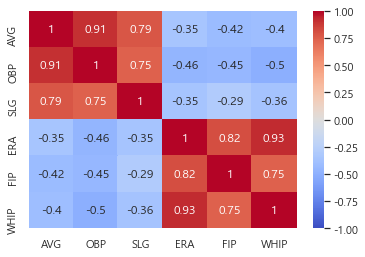

In [5]:
sns.heatmap(X_train.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

1. 전체적으로 타격지표끼리, 투수지표끼리 종속성이 너무 높다.
2. 특히 타율과 출루율, 방어율과 WHIP가 많이 높았다. (아무래도 직접적인 연관이 크기 때문)

따라서, **추후에 데이터를 정할 때는 종속성을 고려하여 차원 축소 혹은 데이터 삭제 등 여러가지를 생각해봐야할 것이다.**

## 가중치 초기화 실험

문득, Xavier initialization을 적용했을 때와 안했을 때의 차이가 궁금해져서 실험해보았다.

In [6]:
# 뉴럴네트워크 생성
nn = neural_network.neuralnetwork()

# 학습
learning_rate = 0.01
epochs = 829
output_1 = nn.train(X_train, y_train, learning_rate, epochs)

100%|████████████████████████████████████████████████████████████████████████████████| 829/829 [00:08<00:00, 94.34it/s]


In [7]:
# 뉴럴네트워크 생성
nn2 = neural_network.neuralnetwork()

# Xavier initialization
nn2.xavier_initialization

# 학습
learning_rate = 0.01
epochs = 829
output_2 = nn2.train(X_train, y_train, learning_rate, epochs)

100%|████████████████████████████████████████████████████████████████████████████████| 829/829 [00:08<00:00, 93.65it/s]


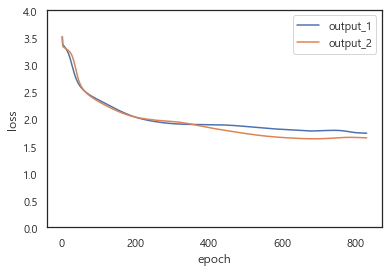

In [8]:
sns.lineplot(data=output_1, x="epoch", y="loss")
sns.lineplot(data=output_2, x="epoch", y="loss")
plt.ylim([0, max(output_1["loss"])+0.5])
plt.legend(labels = ["output_1", "output_2"])

큰 차이는 없는 듯하다.

## 실험 결과 

In [9]:
# 테스트 데이터 로드
test_data = pd.read_csv("data/KBO_TEST.csv")

# 전처리
X_test, y_test = test_data.drop('GRADE', axis=1), test_data['GRADE']
X_test = data_preprocessing.preprocess_X(X_test)
y_test = data_preprocessing.preprocess_y(y_test)

# 스케일링
X_test, mean, std = data_preprocessing.standard_X(X_test, mean = mean, std = std)

# 예측
pred_top3, pred_detail = nn.predict(X_test, y_test, TEAM = test_data.dropna()['TEAM'])

데이터는 2022시즌 전반기까지의 데이터이다. 팀별로 확인해보자. 팀은 현재순위 순서이다.

### 1위) SSG 랜더스

Text(0, 0.5, '확률')

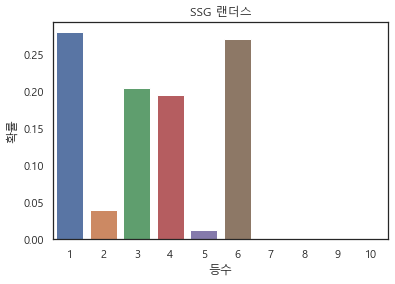

In [10]:
sns.barplot(pred_detail['SSG'].index, pred_detail['SSG'].values)
plt.title('SSG 랜더스')
plt.xlabel('등수')
plt.ylabel('확률')

부동의 1위팀답게 1위확률이 가장 높으며, 대부분의 수치가 가을야구를 향하고 있다. 6등 확률이 1등확률 다음으로 높게 나온게 흠이다.

### 2위) 키움 히어로즈

Text(0, 0.5, '확률')

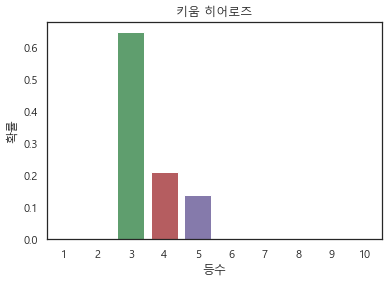

In [11]:
sns.barplot(pred_detail['KIWOOM'].index, pred_detail['KIWOOM'].values)
plt.title('키움 히어로즈')
plt.xlabel('등수')
plt.ylabel('확률')

우승까지는 힘들지만, 가을야구는 무조건 가는 팀이다. 예상과 비슷하다.

### 3위) LG 트윈스

Text(0, 0.5, '확률')

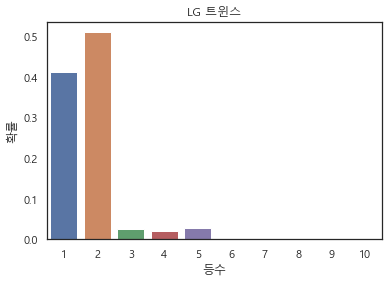

In [12]:
sns.barplot(pred_detail['LG'].index, pred_detail['LG'].values)
plt.title('LG 트윈스')
plt.xlabel('등수')
plt.ylabel('확률')

LG 또한 역시 강팀이다. 우승후보다운 확률이다.

### 4위) KT 위즈

Text(0, 0.5, '확률')

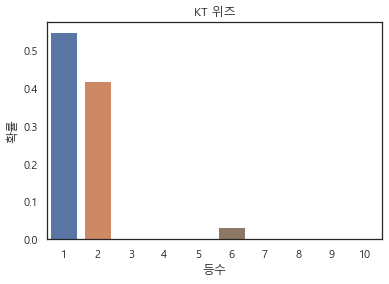

In [13]:
sns.barplot(pred_detail['KT'].index, pred_detail['KT'].values)
plt.title('KT 위즈')
plt.xlabel('등수')
plt.ylabel('확률')

역시 작년 우승팀이다. 초반에는 부상 등 여러가지 이슈때문에 하위권에 쳐져있다가 최근들어 놀라운 기세로 4위까지 올라왔다. 충분히 더 위로 올라갈 여지가 있는 팀이라고 해석된다.

### 5위) 기아 타이거즈

Text(0, 0.5, '확률')

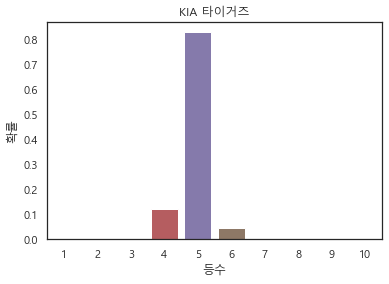

In [14]:
sns.barplot(pred_detail['KIA'].index, pred_detail['KIA'].values)
plt.title('KIA 타이거즈')
plt.xlabel('등수')
plt.ylabel('확률')

다른 팀에 비해서 등수 예측이 확연한 편이다. 5등의 확률이 80%가 넘어간다. 놀라운 타격과 탄탄한 마무리 등으로 기세를 타며, 상위권까지 올라갔지만, 용병 투수들의 아쉬운 활약속에서 선발진이 무너지며 최근 연패를 거듭했다. 아무래도 하위권갈 전력은 아니지만, 용병 투수의 문제로 인해 상위권은 힘든 전력이다. 

### 6위) 롯데 자이언츠

Text(0, 0.5, '확률')

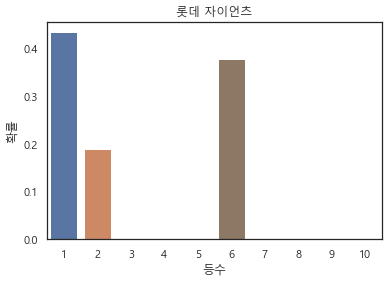

In [15]:
sns.barplot(pred_detail['LOTTE'].index, pred_detail['LOTTE'].values)
plt.title('롯데 자이언츠')
plt.xlabel('등수')
plt.ylabel('확률')

1등과 2등 확률이 생각보다 잘나와서 놀라웠다. 보이는 지표에 비해서 역시 세밀한 플레이(수비 등)가 부족한 팀이라서 그럴지도 모른다.

### 7위) 두산 베어스

Text(0, 0.5, '확률')

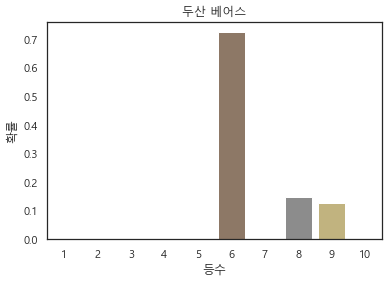

In [16]:
sns.barplot(pred_detail['DOOSAN'].index, pred_detail['DOOSAN'].values)
plt.title('두산 베어스')
plt.xlabel('등수')
plt.ylabel('확률')

항상 가을야구는 가던 강팀이었지만, 올해는 힘든가보다. 잘해봤자 6위가 예측된다. 작년 mvp인 미란다의 부상이 컸을 것이다.

### 8위) 삼성 라이온즈

Text(0, 0.5, '확률')

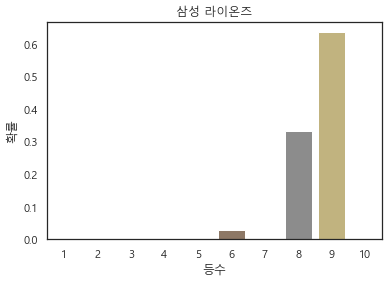

In [17]:
sns.barplot(pred_detail['SAMSUNG'].index, pred_detail['SAMSUNG'].values)
plt.title('삼성 라이온즈')
plt.xlabel('등수')
plt.ylabel('확률')

현재 창단 최다인 11연패를 기록하고 있는 팀이다. (2022년 7월 17일 기준) 확실히 낮은 등수가 예측되었다. 작년 최고 승률팀의 몰락이다. 한편, 연패 기간동안 100실점을 넘게 줬으니 방어율과 같은 투수관련 지표가 크게 올랐고 이것이 예측하는데 영향이 컸을 것이다.

### 9위) NC 다이노스

Text(0, 0.5, '확률')

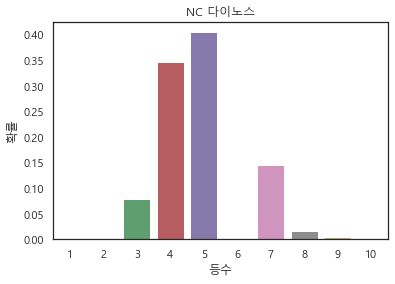

In [18]:
sns.barplot(pred_detail['NC'].index, pred_detail['NC'].values)
plt.title('NC 다이노스')
plt.xlabel('등수')
plt.ylabel('확률')

9위 팀치고 좋은 예측을 보여준다. 확실히 시즌개막전 여러 전문가들이 가을은 갈 것이라고 지목한 팀이다. 하지만, 시즌초반 여러 이슈와 함께 승수를 많이 쌓지 못했고 조금씩 반등하는 기미는 보여줬지만 아직 갈 길은 많이 남았다. 확실히 야구는 투수놀음인게, 루친스키와 구창모라는 필승카드덕분에 좋아진 투수지표가 이 예측에 도움이 되었다고 생각한다.

### 10위) 한화 이글스

Text(0, 0.5, '확률')

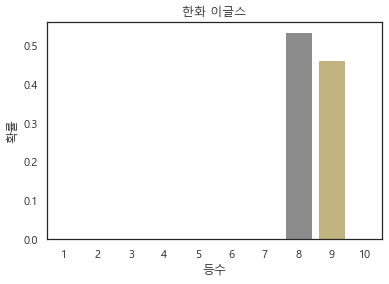

In [19]:
sns.barplot(pred_detail['HANHWA'].index, pred_detail['HANHWA'].values)
plt.title('한화 이글스')
plt.xlabel('등수')
plt.ylabel('확률')

부동의 약팀이다. 모든 지표에서 낙제점에 가까운 지표를 지니고 있었으며 이는 그래프에서 드러난다. 데이터의 부족과 dependency문제때문에 10등이 안나왔다고 생각된다.

## Xavier initialization 예측 결과

In [20]:
# 예측
pred_top3, pred_detail = nn2.predict(X_test, y_test, TEAM = test_data.dropna()['TEAM'])
print(pred_top3)
print(pred_detail)

   SSG  KIWOOM  LG  KT  KIA  LOTTE  DOOSAN  SAMSUNG  NC  HANHWA
1    3       3   2   5    6      1       8        9   7      10
2    4       4   1   3    4      5       7        8   9       9
3    5       2   3   4    5      2       9        7   8       8
     SSG  KIWOOM    LG    KT   KIA  LOTTE  DOOSAN  SAMSUNG    NC  HANHWA
1  0.047   0.121 0.318 0.023 0.004  0.887   0.000    0.000 0.000   0.000
2  0.025   0.124 0.652 0.012 0.001  0.007   0.000    0.000 0.000   0.000
3  0.394   0.510 0.021 0.358 0.007  0.000   0.000    0.000 0.000   0.000
4  0.309   0.127 0.003 0.193 0.306  0.000   0.003    0.000 0.001   0.000
5  0.218   0.117 0.006 0.388 0.185  0.105   0.000    0.000 0.002   0.000
6  0.007   0.001 0.000 0.024 0.472  0.000   0.073    0.001 0.056   0.000
7  0.000   0.000 0.000 0.001 0.018  0.000   0.356    0.110 0.458   0.006
8  0.000   0.000 0.000 0.000 0.007  0.000   0.467    0.432 0.196   0.027
9  0.000   0.000 0.000 0.000 0.000  0.000   0.100    0.448 0.261   0.284
10 0.000   0.0

별 차이가 없다고 생각했는데, 흐름은 비슷하지만 결과에서 조금의 변화가 있었다. 아무래도 loss값 자체가 너무 높기 때문이라고 생각한다.
LG가 우승권이며 SSG, 키움, KT, 기아 등은 가을야구권이라고 예측되었다. 그리고 두산, 삼성, NC, 한화는 하위권이 예상되었다.

제일 눈에 띄는건, 롯데인데... 내 주관이 들어간걸까...모르겠다. 좋은 지표가 FIP밖에 없는데, 이 지표가 영향이 크다고 밖에 생각이 안된다. 아 몰라, 롯데 화이팅 !!!